# Predicting Hospital Readmission of Patients with Diabetes
As our health care is moving towards value based care, there are many different programs that have been created one being Hospital Readmission Reduction Program(HRRP).
This program reduces hospital reimbursments with admission rates above the threshold.
So for this project i will focus on creating a predictive model to help identify the patients who are at risk of being readmitted.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the csv file
diabetes = pd.read_csv('diabetes.csv')

## Exploring the Data

In [2]:
#shape of the data
#what are the columns
print(diabetes.columns)
print(diabetes.shape)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
(101766, 50)


In [3]:
#how does the head of the data look like
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#how does the tail of the data look like
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
#creating a function to show a summary of null values and ? in our features

def summary():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    null_values = diabetes.apply(lambda x:x.isnull().sum())
    blank_char = diabetes.apply(lambda x:x.isin(['?']).sum())
    percent_blank_char = diabetes.apply(lambda x:round((x.isin(['?']).sum()/diabetes.shape[0])*100, 2))
    unique_values = diabetes.apply(lambda x:len(x.unique()))
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

In [6]:
# lets display this
#%%time
print('Function Information',summary.__doc__)
view = summary()
display(view)

Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
encounter_id,0,0,0.00,101766
patient_nbr,0,0,0.00,71518
race,0,2273,2.23,6
gender,0,0,0.00,3
age,0,0,0.00,10
weight,0,98569,96.86,10
admission_type_id,0,0,0.00,8
discharge_disposition_id,0,0,0.00,26
admission_source_id,0,0,0.00,17
time_in_hospital,0,0,0.00,14


In [7]:
#lets separate and look at the % of ?
view[view['% ? Values'] != 0]

,null_values,? Values,% ? Values,unique_values
race,0,2273,2.23,6
weight,0,98569,96.86,10
payer_code,0,40256,39.56,18
medical_specialty,0,49949,49.08,73
diag_1,0,21,0.02,717
diag_2,0,358,0.35,749
diag_3,0,1423,1.40,790


In [8]:
## Loading the ID dataset to help understand some of the codes used in the discharge _id
IDS = pd.read_csv('ids.csv')

In [9]:
IDS.head(20)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [10]:
IDS.describe()

,admission_type_id,description
count,65,62
unique,32,58
top,8,Not Mapped
freq,3,2


In [11]:
diabetes['number_diagnoses'].value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

## Target
The aim of the project is to predict if patients were readmitted to hospital so we will look at the readmitted column

In [12]:
diabetes['readmitted'].value_counts(normalize=True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

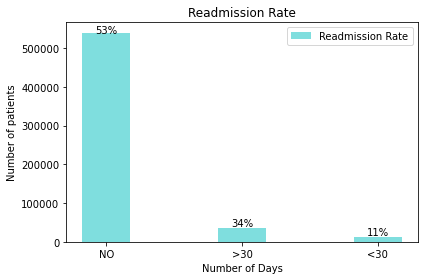

In [13]:
#visualizing distribution of the classes
n_groups = 3

Zipf_Values = (539119, 34928, 11159)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, Zipf_Values, bar_width, color='c', 
    label='Readmission Rate', alpha= 0.5)

plt.xlabel('Number of Days')
plt.ylabel('Number of patients')
plt.title('Readmission Rate')
plt.xticks(index , ('NO', '>30', '<30'))
plt.legend()

test_values = [53.91, 34.93, 11.16]
i = 0
for rect in rects1:
    height = test_values[i]
    h_rect = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*h_rect,
            '%d' % int(height) + "%", ha='center', va='bottom')
    i += 1

plt.tight_layout()
plt.show()

In [14]:
# there are three classes. We will make it a binary class
#lets recode the "readmitted" classes so its binary we combine the readmission variables ">30" and "<30". 
# New classes:
#0 represents No readdmission
#1 represents readmisssion
diabetes['readmitted'] = pd.Series([0 if val == 'NO'
                                   else 1 for val in diabetes['readmitted']])

# let's confirm
diabetes['readmitted'].value_counts(normalize = True)

0    0.539119
1    0.460881
Name: readmitted, dtype: float64

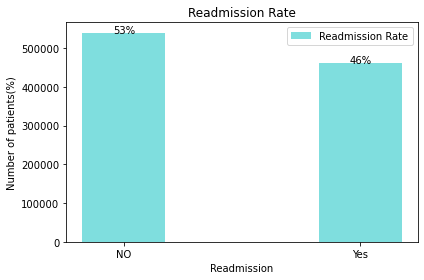

In [15]:
n_groups = 2

Zipf_Values = (539119, 460881)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, Zipf_Values, bar_width, color='c', 
    label='Readmission Rate', alpha= 0.5)

plt.xlabel('Readmission')
plt.ylabel('Number of patients(%)')
plt.title('Readmission Rate')
plt.xticks(index , ('NO', 'Yes'))
plt.legend()

test_values = [53.91, 46.08]
i = 0
for rect in rects1:
    height = test_values[i]
    h_rect = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*h_rect,
            '%d' % int(height) + "%", ha='center', va='bottom')
    i += 1

plt.tight_layout()
plt.show()

## Data Cleaning 

In [16]:
# from what we have seen of the data we need to handle the ? values as well as reduce unique values for features like diag_1, diag_2 and diag_3
#lets make a copy of the data first
Diabetes = diabetes.copy()


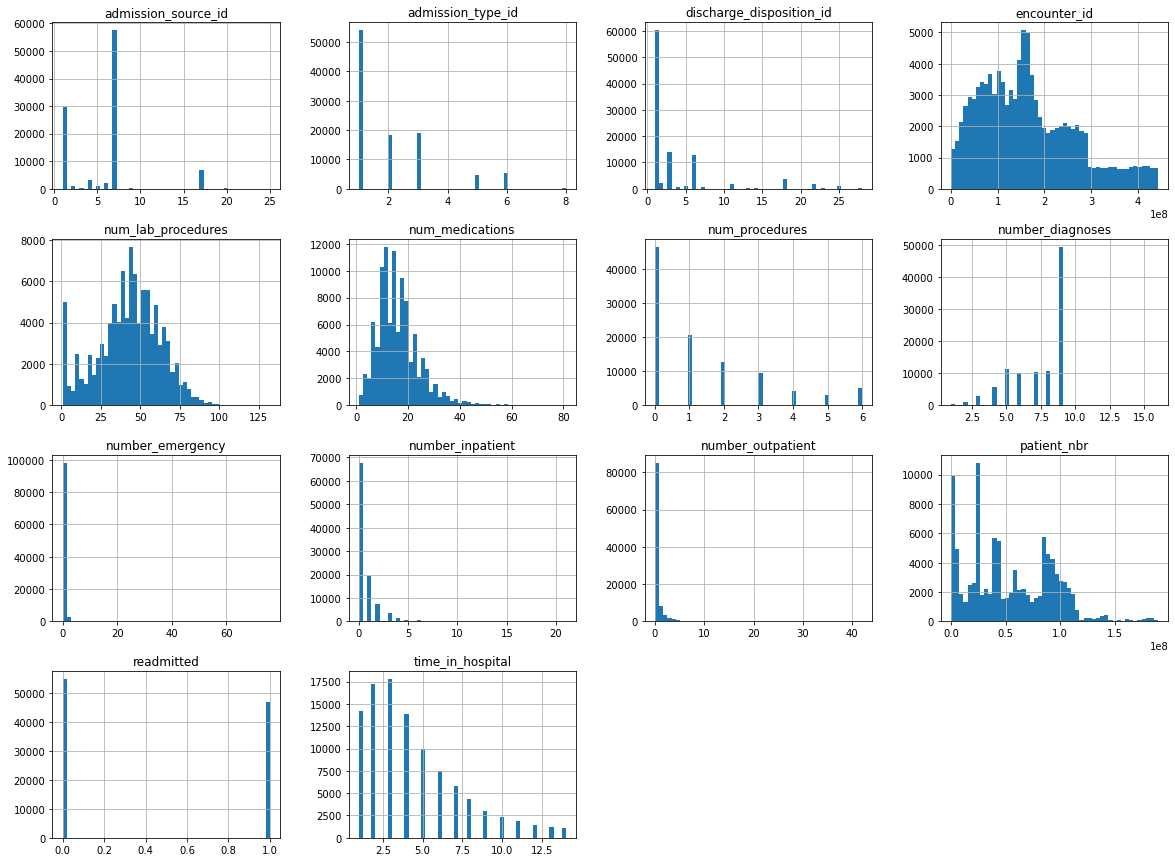

In [17]:

#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
Diabetes.hist(bins=50, figsize=(20,15))
plt.show()

There is a lot of noise ,redundant and incomplete information in the data. there were several features that i could not handle as they had to many missing featues: weigh(97%), payer_code(40%), medical_speciality(47%)

Medical specialty attribute was maintained, adding the value “missing” in order to account for missing values. Large percentage of missing values of the weight attribute can be explained by the fact that prior to the HITECH legislation of the American Reinvestment and Recovery Act in 2009 hospitals and clinics were not required to capture it in a structured format.

In [18]:
#lets drop the columns we
Diabetes= Diabetes.drop(columns=['weight','payer_code'])

In [19]:
# Removing the pateints from the dataset that are dead.

Diabetes = Diabetes[((Diabetes.discharge_disposition_id != 11) & 
                                          (Diabetes.discharge_disposition_id != 13) &
                                          (Diabetes.discharge_disposition_id != 14) & 
                                          (Diabetes.discharge_disposition_id != 19) & 
                                          (Diabetes.discharge_disposition_id != 20) & 
                                          (Diabetes.discharge_disposition_id != 21))]


In [20]:
#what the shape
Diabetes.shape

(99343, 48)

In [21]:
#still alot of cleaning remains so let create a function that aids
 #for each column
for c in list(Diabetes.columns):
    
    # get a list of unique values
    n = Diabetes[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6  5  4  7  9  8 15 10 11 14 12 13 17 16 21 18 19]
diag_1: 716 unique values
diag_2: 748 unique values
diag_3: 787 unique values
number_diagnoses
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
max_glu_serum
['No

# Lets breakdown the information
patient_nbr is an identifier so we can remove it from the features
mediacal _speciality has many features so we can reduce these
diag1-diag3 have over 700 unique values. Choice is to group or drop lets see how important they are as we move along.
Race has some ? we need to deal with this too 
we could reduce the classes of age to make it more sensible

# Missing Values

In [22]:
# Impute missing categorical values

Diabetes['race'] = Diabetes['race'].fillna('UNKNOWN')

Diabetes['medical_specialty'] = Diabetes['medical_specialty'].fillna('UNKNOWN')


# Feature Engineering

In [23]:
#feature engineering for age reducing the classes to 4
age_id =  {'[0-10)':'Junior',
          '[10-20)':'Junior', 
          '[20-30)':'Young Adult', 
          '[30-40)':'Adult', 
          '[40-50)':'Adult', 
          '[50-60)':'Adult',
          '[60-70)':'Senior', 
          '[70-80)':'Senior', 
          '[80-90)':'Senior', 
          '[90-100)':'Senior'}
Diabetes['age_group'] = Diabetes['age'].replace(age_id)

In [24]:
#reducing discharge disposition to two classes
Diabetes['discharge'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in Diabetes['discharge_disposition_id']], index=Diabetes.index)

In [25]:
#medical speciality reducing the number of unique values to 10
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
Diabetes['med_spec'] = Diabetes['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
Diabetes.loc[~Diabetes.med_spec.isin(top_10),'med_spec'] = 'Other'

In [26]:
Diabetes.shape

(99343, 51)

# Plots

### Diag_1

In [27]:
#diagnosis
condition = {"Neoplasms": np.arange(140, 240).tolist()
    , "Diabetes": [250]
    , "Circulatory": np.append(785, np.arange(390, 460)).tolist()
    , "Respiratory": np.append(786, np.arange(460, 520)).tolist()
    , "Digestive": np.append(787, np.arange(520, 580)).tolist()
    , "Genitourinary": np.append(788, np.arange(580, 630)).tolist()
    , "Musculoskeletal": np.arange(710, 740).tolist()
    , "Injury": np.arange(800, 1000).tolist()
             }
# reverse the condition dictionary
conditionrvs = {np.str(value): key for key, values in condition.items() for value in values}
Diabetes.diag_1 = Diabetes.diag_1.replace(conditionrvs.keys(), conditionrvs.values())
Diabetes.diag_1[~Diabetes.diag_1.isin(condition.keys())] = np.nan
Diabetes.diag_1 = Diabetes.diag_1.fillna("Other")
Diabetes.diag_1.value_counts(1)*100

<ipython-input-27-a0534a033b0d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes.diag_1[~Diabetes.diag_1.isin(condition.keys())] = np.nan


Circulatory        29.877294
Other              26.412530
Respiratory        14.026152
Digestive           9.394723
Injury              6.898322
Genitourinary       5.035080
Musculoskeletal     4.967637
Neoplasms           3.151707
Diabetes            0.236554
Name: diag_1, dtype: float64

Text(0.5, 1.0, 'Readmissions Balance by Diagnosis 1')

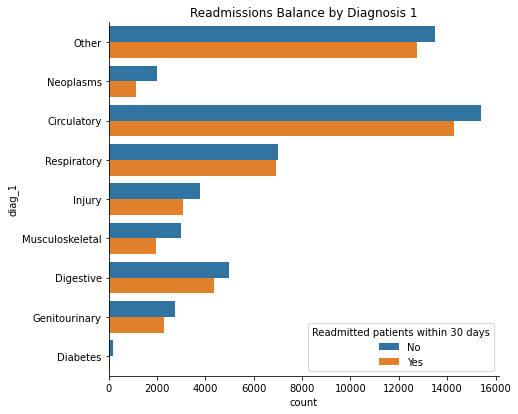

In [28]:
# Readmission and Diag_1,
plot1 = sns.countplot(y = 'diag_1', hue = 'readmitted', data = Diabetes) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 1')# it has little impact on diabetes cases readmission so we will drop it

### Diag_2

In [29]:
Diabetes.diag_2 = Diabetes.diag_2.replace(conditionrvs.keys(), conditionrvs.values())
Diabetes.diag_2[~Diabetes.diag_2.isin(condition.keys())] = np.nan
Diabetes.diag_2 = Diabetes.diag_2.fillna("Other")
Diabetes.diag_2.value_counts(1)*100

<ipython-input-29-a67789a01753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes.diag_2[~Diabetes.diag_2.isin(condition.keys())] = np.nan


Other              33.255489
Circulatory        31.364062
Respiratory        10.458714
Genitourinary       8.200880
Diabetes            6.091018
Digestive           4.115036
Injury              2.400773
Neoplasms           2.341383
Musculoskeletal     1.772646
Name: diag_2, dtype: float64

Text(0.5, 1.0, 'Readmissions Balance by Diagnosis 2')

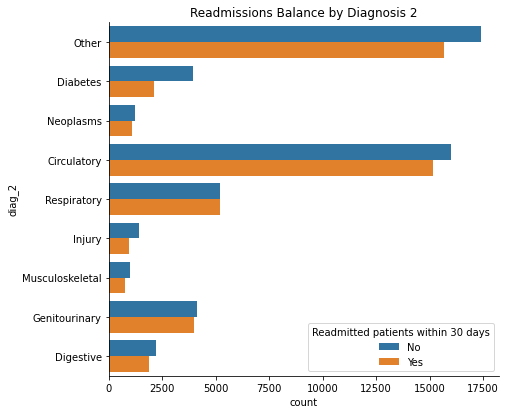

In [30]:
# Readmission and Diag_2,
plot1 = sns.countplot(y = 'diag_2', hue = 'readmitted', data = Diabetes) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 2')

### Diag_3

In [31]:
Diabetes.diag_3 = Diabetes.diag_3.replace(conditionrvs.keys(), conditionrvs.values())
Diabetes.diag_3[~Diabetes.diag_3.isin(condition.keys())] = np.nan
Diabetes.diag_3 = Diabetes.diag_3.fillna("Other")
Diabetes.diag_3.value_counts(1)*100

<ipython-input-31-c1a11b30a888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes.diag_3[~Diabetes.diag_3.isin(condition.keys())] = np.nan


Other              35.755916
Circulatory        29.795758
Diabetes           11.541830
Respiratory         7.051327
Genitourinary       6.478564
Digestive           3.882508
Injury              1.910552
Musculoskeletal     1.910552
Neoplasms           1.672992
Name: diag_3, dtype: float64

Text(0.5, 1.0, 'Readmissions Balance by Diagnosis 3')

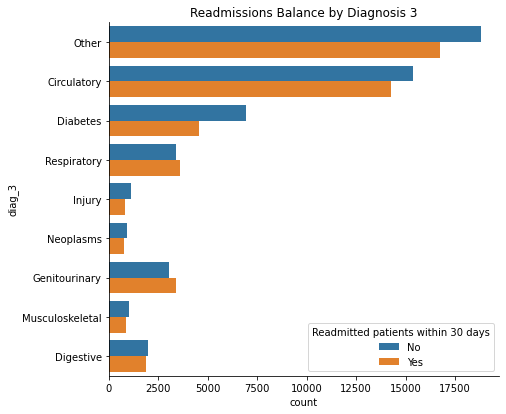

In [32]:
# Readmission and Diag_3,
plot1 = sns.countplot(y = 'diag_3', hue = 'readmitted', data = Diabetes) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 3') # is significant for our model

### Gender and readmission

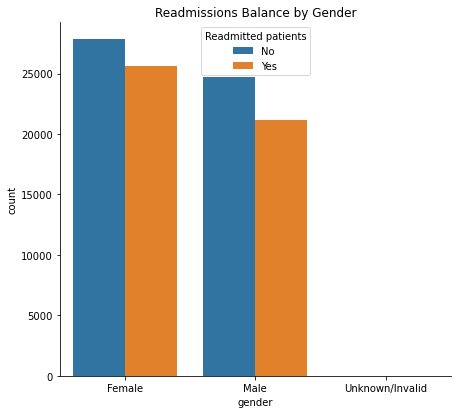

In [33]:

#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = Diabetes) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

In [34]:
#We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.
Diabetes['A1Cresult'] = Diabetes['A1Cresult'].replace('>7', 1)
Diabetes['A1Cresult'] = Diabetes['A1Cresult'].replace('>8', 1)
Diabetes['A1Cresult'] = Diabetes['A1Cresult'].replace('Norm', 0)
Diabetes['A1Cresult'] = Diabetes['A1Cresult'].replace('None', -99)
Diabetes['max_glu_serum'] = Diabetes['max_glu_serum'].replace('>200', 1)
Diabetes['max_glu_serum'] = Diabetes['max_glu_serum'].replace('>300', 1)
Diabetes['max_glu_serum'] = Diabetes['max_glu_serum'].replace('Norm', 0)
Diabetes['max_glu_serum'] = Diabetes['max_glu_serum'].replace('None', -99)

### Readmission by Age_group

Text(0.5, 1.0, 'Readmissions by Age')

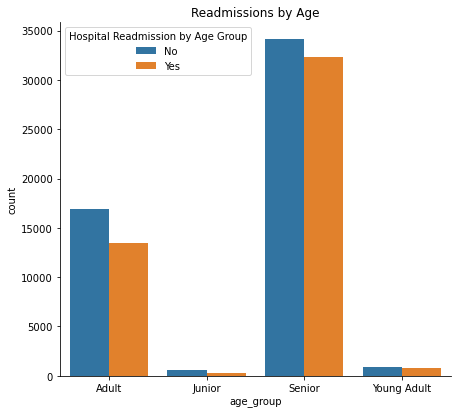

In [35]:
grp = Diabetes['age_group'].unique()
grp.sort()
grp_sort = np.array(grp).tolist()


ageplt = sns.countplot(x = 'age_group', hue = 'readmitted', data = Diabetes, order = grp_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Hospital Readmission by Age Group', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions by Age')

## Numerical Features

/home/parent/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/parent/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


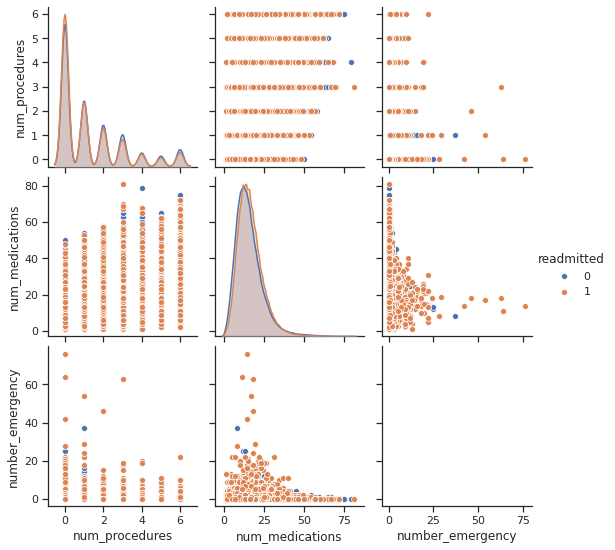

In [36]:
#numerical features
import seaborn as sns
#import warnings
sns.set(style="ticks")
subset1 = Diabetes[['num_procedures', 'num_medications', 'number_emergency', 'readmitted']]
sns.pairplot(subset1, hue="readmitted");

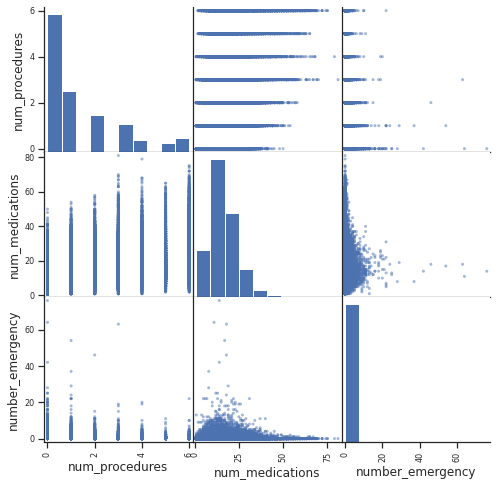

In [37]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
#two variables then we can consider one of them.
import seaborn as sns
sm = pd.plotting.scatter_matrix(Diabetes[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

## Categorical Features

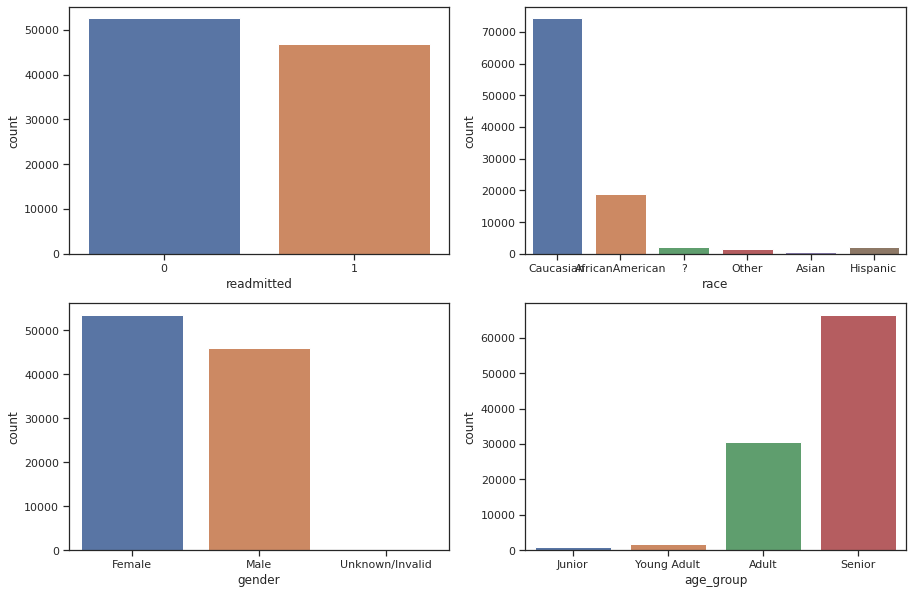

In [38]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=Diabetes, ax=ax[0][0])
sns.countplot(x="race", data=Diabetes, ax=ax[0][1])
sns.countplot(x="gender", data=Diabetes, ax=ax[1][0])
sns.countplot(x="age_group", data=Diabetes, ax=ax[1][1])

## Readmission by Medication Count

In [39]:
Diabetes2 = Diabetes[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','readmitted']]

In [40]:

[Diabetes2.iloc[:,0:25].isin(["NO"])]

[        metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
 0           False        False        False           False        False   
 1           False        False        False           False        False   
 2           False        False        False           False        False   
 3           False        False        False           False        False   
 4           False        False        False           False        False   
 ...           ...          ...          ...             ...          ...   
 101761      False        False        False           False        False   
 101762      False        False        False           False        False   
 101763      False        False        False           False        False   
 101764      False        False        False           False        False   
 101765      False        False        False           False        False   
 
         acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  .

In [41]:
#data_med = data_med.where(data_med != 'No', 1)
Diabetes2['diabetic_medication_count'] = 23 - Diabetes2.iloc[:,0:22].isin(["No"]).sum(1)
Diabetes2.head(15)

<ipython-input-41-de85a194f24b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes2['diabetic_medication_count'] = 23 - Diabetes2.iloc[:,0:22].isin(["No"]).sum(1)


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,diabetic_medication_count
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,0,1
1,No,No,No,No,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,1,2
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,0,2
3,No,No,No,No,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,0,2
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3
5,No,No,No,No,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,1,2
6,Steady,No,No,No,Steady,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,0,4
7,No,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,1,2
8,No,No,No,No,No,No,Steady,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3
9,No,No,No,No,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3


Text(0.5, 1.0, 'Readmissions Balance by Diabetic Medication Count')

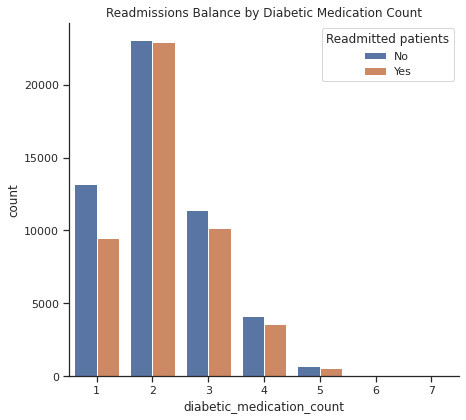

In [42]:

plot1 = sns.countplot(x = 'diabetic_medication_count', hue = 'readmitted', data = Diabetes2) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diabetic Medication Count')

In [43]:
#Recode yes/no variables to numeric
Diabetes['diabetesMed']=Diabetes['diabetesMed'].map(dict(Yes=1, No=0))
Diabetes['change']=Diabetes['change'].map(dict(Ch=1, No=0))

In [44]:
Diabetes.shape

(99343, 51)

In [45]:
Diabetes['age_group']

0              Junior
1              Junior
2         Young Adult
3               Adult
4               Adult
             ...     
101761         Senior
101762         Senior
101763         Senior
101764         Senior
101765         Senior
Name: age_group, Length: 99343, dtype: object

### Drop columns that have been used for feature engineering

In [47]:
Diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_group', 'discharge', 'med_spec'],
      dtype='object')

In [48]:
Diabetes['race'].value_counts()

Caucasian          74220
AfricanAmerican    18772
?                   2234
Hispanic            2017
Other               1472
Asian                628
Name: race, dtype: int64

## Summary of Null Values and ? by percentage

In [49]:
#creating a function to show a summary of null values and ? in our features

def summary2():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    null_values2 = Diabetes.apply(lambda x:x.isnull().sum())
    blank_char2 = Diabetes.apply(lambda x:x.isin(['?']).sum())
    percent_blank_char2 = Diabetes.apply(lambda x:round((x.isin(['?']).sum()/Diabetes.shape[0])*100, 2))
    unique_values2 = Diabetes.apply(lambda x:len(x.unique()))
    return pd.DataFrame({'null_values':null_values2,
                         '? Values':blank_char2,'% ? Values':percent_blank_char2
                        ,'unique_values':unique_values2})

In [50]:
# lets display this
#%%time
print('Function Information',summary2.__doc__)
view2 = summary2()
display(view2)

Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
encounter_id,0,0,0.00,99343
patient_nbr,0,0,0.00,69990
race,0,2234,2.25,6
gender,0,0,0.00,3
age,0,0,0.00,10
admission_type_id,0,0,0.00,8
discharge_disposition_id,0,0,0.00,21
admission_source_id,0,0,0.00,17
time_in_hospital,0,0,0.00,14
medical_specialty,0,48616,48.94,73


In [51]:
#lets check the null values
#lets separate and look at the % of ?
view2[view2['% ? Values'] != 0]

,null_values,? Values,% ? Values,unique_values
race,0,2234,2.25,6
medical_specialty,0,48616,48.94,73


# More Data Cleaning

### Dropping columns that have been used for feature engineering or are not useful for models

In [53]:

Diabetes = Diabetes[(Diabetes.race != '?')]
Diabetes

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,discharge,med_spec
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,0,0,0,Junior,Other discharge,Other
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,No,No,No,1,1,1,Junior,Home,Other
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,0,1,0,Young Adult,Home,Other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,No,No,No,1,1,0,Adult,Home,Other
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,No,No,No,1,1,0,Adult,Home,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,?,...,No,No,No,No,1,1,1,Senior,Other discharge,Other
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,?,...,No,No,No,No,0,1,0,Senior,Other discharge,Other
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,?,...,No,No,No,No,1,1,0,Senior,Home,Other
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,No,No,No,1,1,0,Senior,Other discharge,Surgery-General


# Race column had ?. Let look at it again
We already engineered med_spec from medical_speciality so we will drop the column

In [54]:
Diabetes['race'].value_counts() # the "?" have been handled

Caucasian          74220
AfricanAmerican    18772
Hispanic            2017
Other               1472
Asian                628
Name: race, dtype: int64

Text(0.5, 1.0, 'Readmissions by Race')

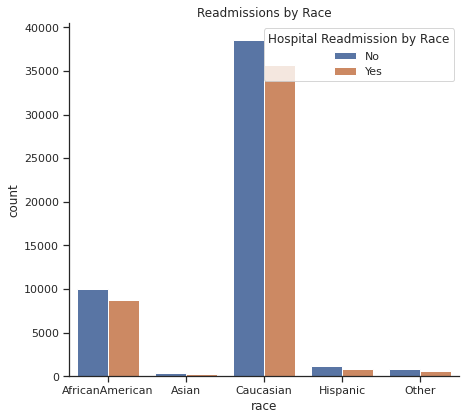

In [61]:
ra = Diabetes['race'].unique()
ra.sort()
ra_sort = np.array(ra).tolist()


raceplt = sns.countplot(x = 'race', hue = 'readmitted', data = Diabetes, order = ra_sort) 

sns.despine()
raceplt.figure.set_size_inches(7, 6.5)
raceplt.legend(title = 'Hospital Readmission by Race', labels = ('No', 'Yes'))
raceplt.axes.set_title('Readmissions by Race')

In [55]:
Diabetes['med_spec'].value_counts()

Other                         55472
InternalMedicine              13805
Emergency/Trauma               7395
Family/GeneralPractice         7085
Cardiology                     5176
Surgery-General                3003
Nephrology                     1519
Orthopedics                    1369
Orthopedics-Reconstructive     1187
Radiologist                    1098
Name: med_spec, dtype: int64

In [56]:
#drop the columns that we will not use
dels =['medical_specialty','age','discharge_disposition_id', 'admission_source_id', 
               'admission_type_id','patient_nbr','encounter_id','diag_1']

Diabetes= Diabetes.drop(columns=dels)

In [57]:
Diabetes.shape

(97109, 43)

## splitting the data to train and test

In [58]:
##Splitting the data
from sklearn.model_selection import train_test_split

# Split train into train & val
train, test = train_test_split(Diabetes, train_size=0.80, test_size=0.20, 
                              stratify=Diabetes['readmitted'], random_state=42)

In [59]:
### Saving train and test to csv files for use in creating our models
#lest save them to csv files that we can use in future
train.to_csv('Train.csv',index=False)

test.to_csv('Test.csv',index=False)